In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
%matplotlib inline

In [2]:
N = 2**16
B = 100e6
df = B/N #frequency spacing

In [94]:
Ntones = 10
exponent = 1
wavetable = np.zeros(N)
tone_indices = np.random.randint(0, N, Ntones)
#print (len(tone_indices))
wavetable[tone_indices] = (N)/Ntones**exponent

In [95]:
freqs = np.arange(N)*df/1e6 - 50
z = np.fft.ifft(wavetable)*N
x = np.real(z)
y = np.imag(z)
# Clip the waveforms to keep them within the DAC range
x[x > N/2] = N/2
x[x < -N/2] = -N/2
y[y > N/2] = N/2
y[y < -N/2] = -N/2
z = x + 1j*y
#t = np.fft.fftshift(np.fft.fftfreq(N, d=df))
dt = 1/(100e6)
t = np.arange(N)*dt*1e6

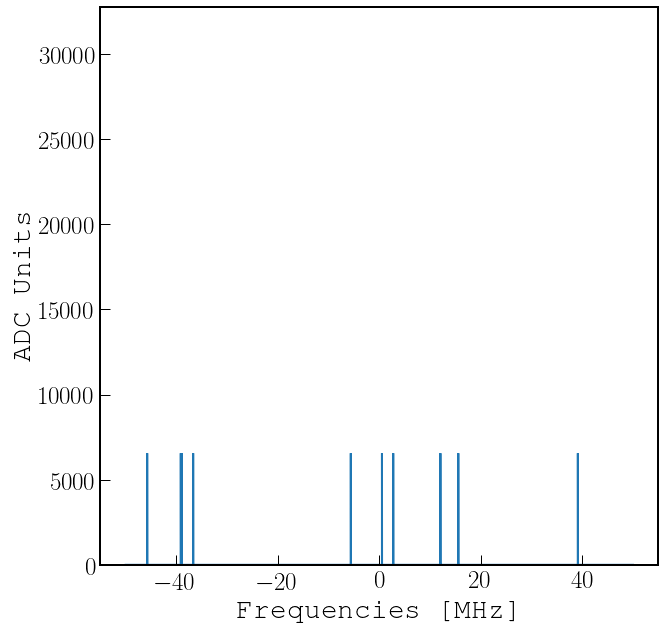

In [96]:
fig, ax =plt.subplots(figsize=(10,10))
ax.plot(freqs, wavetable);
ax.set_ylim(ymin=0, ymax=N/2)
ax.set_xlabel(r'Frequencies [MHz]')
ax.set_ylabel(r'ADC Units');

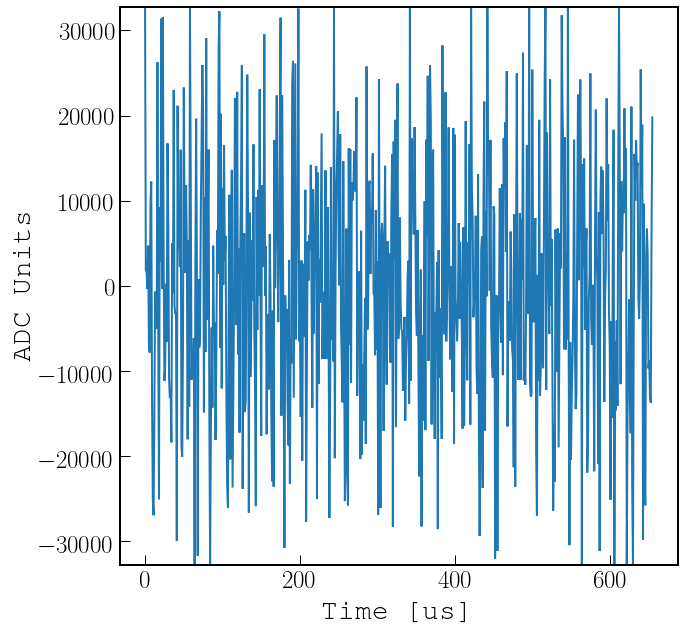

In [97]:
fig, ax =plt.subplots(figsize=(10,10))
ax.plot(t[::100], np.real(z)[::100]);
ax.set_ylim(ymin=-N/2, ymax=N/2)
ax.set_xlabel(r'Time [us]')
ax.set_ylabel(r'ADC Units');

In [98]:
# Fourier transform back to see the impact of the clipping
zf = np.fft.fftshift(np.fft.fft(z))/N
freqf = np.fft.fftfreq(N, dt)/1e6

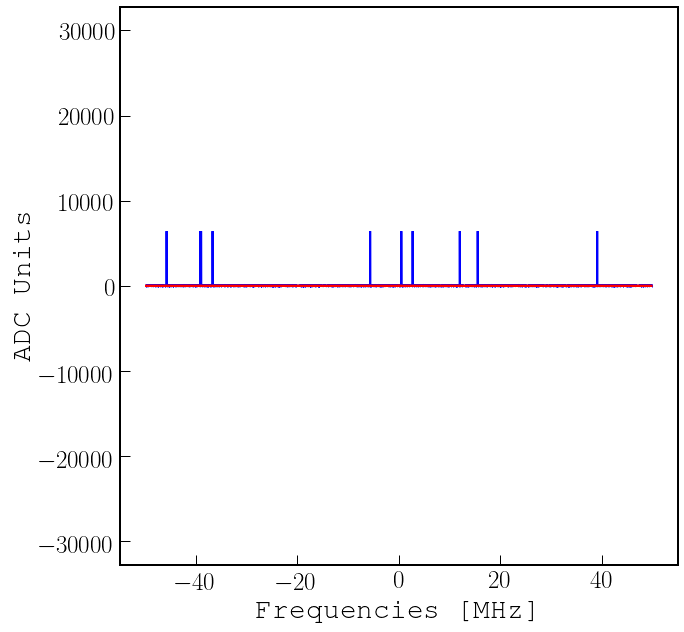

In [99]:
fig, ax =plt.subplots(figsize=(10,10))
ax.plot(freqf, np.real(zf), 'b');
ax.plot(freqf, np.imag(zf), 'r');
ax.set_ylim(ymin=0-N/2, ymax=N/2)
ax.set_xlabel(r'Frequencies [MHz]')
ax.set_ylabel(r'ADC Units');